<a href="https://colab.research.google.com/github/rachalanalytics/clean_titantic/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load Titanic dataset
titanic_data = sns.load_dataset('titanic')

# Display the first few records
print(titanic_data.head())

# Review the structure of the dataset
print(titanic_data.info())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-nu

In [2]:
# Null/Missing values

# Check for missing values
na_counts = titanic_data.isna().sum()

# Filter to show only columns with missing values
na_counts = na_counts[na_counts > 0]

# Display column names and the counts of missing values
print(na_counts)

age            177
embarked         2
deck           688
embark_town      2
dtype: int64


In [3]:
# Solution:
# We can impute age, given the considerable amount of rows missing and using sex to fill in the median values
titanic_data['age'] = titanic_data.groupby(['sex', 'pclass'])['age'].transform(lambda x: x.fillna(x.median()))

# Embarked has only 2 missing values and we can fill these using the most frequent value
titanic_data['embarked'] = titanic_data['embarked'].fillna(titanic_data['embarked'].mode()[0])

# Deck is missing a significant portion of values. This column is not useful to analysis
titanic_data = titanic_data.drop('deck', axis=1)

# Embarked town has only 2 missing values, we can handle it like the embarked column
titanic_data['embark_town'] = titanic_data['embark_town'].fillna(titanic_data['embark_town'].mode()[0])

titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  891 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 79.4+ KB


In [4]:
# Duplicates
duplicates = titanic_data.duplicated()

# Find out if there are any duplicates
has_duplicates = duplicates.any()
print("Are there duplicate rows? ", has_duplicates)

# Count the total number of duplicate rows
num_duplicates = duplicates.sum()
print("Number of duplicate rows: ", num_duplicates)

# Inspect duplicate rows
duplicates_data = titanic_data[titanic_data.duplicated()]
print(duplicates_data)

Are there duplicate rows?  True
Number of duplicate rows:  118
     survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
47          1       3  female  21.5      0      0   7.7500        Q   Third   
64          0       1    male  40.0      0      0  27.7208        C   First   
76          0       3    male  25.0      0      0   7.8958        S   Third   
77          0       3    male  25.0      0      0   8.0500        S   Third   
87          0       3    male  25.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
870         0       3    male  26.0      0      0   7.8958        S   Third   
877         0       3    male  19.0      0      0   7.8958        S   Third   
878         0       3    male  25.0      0      0   7.8958        S   Third   
884         0       3    male  25.0      0      0   7.0500        S   Third   
886         0       2    male  27.0      0      0  13.0000        S 

In [5]:
# Solution:
# Drop all duplicate rows
titanic_data = titanic_data.drop_duplicates()

# Verify duplicates are removed
print("Number of duplicate rows after removal: ", titanic_data.duplicated().sum())

Number of duplicate rows after removal:  0


In [6]:
# Now, lets see if the data values have any inconsistencies in them. We can check each unique value in the columns to determine if more cleaning must be done
# Function to find unique values in each column
def find_inconsistencies(data):
    for column in data.select_dtypes(include=['object', 'category']):
        unique_values = data[column].unique()
        print(f"Column: {column}")
        print(f"Unique Values: {unique_values}\n")

# Check for inconsistencies
find_inconsistencies(titanic_data)

Column: sex
Unique Values: ['male' 'female']

Column: embarked
Unique Values: ['S' 'C' 'Q']

Column: class
Unique Values: ['Third', 'First', 'Second']
Categories (3, object): ['First', 'Second', 'Third']

Column: who
Unique Values: ['man' 'woman' 'child']

Column: embark_town
Unique Values: ['Southampton' 'Cherbourg' 'Queenstown']

Column: alive
Unique Values: ['no' 'yes']



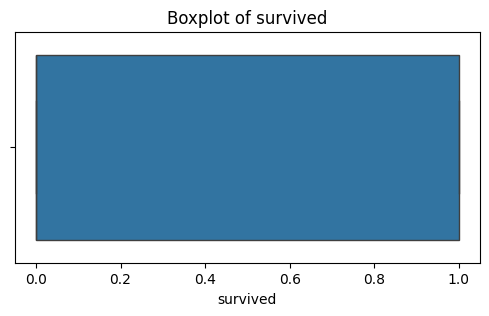

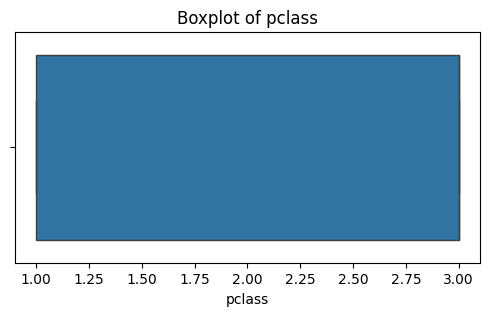

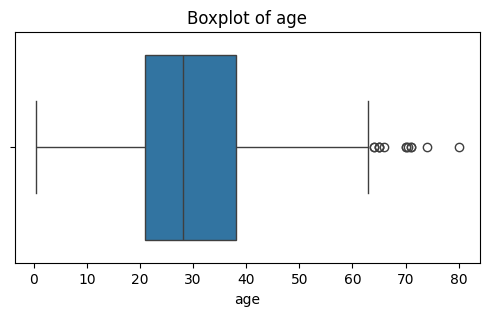

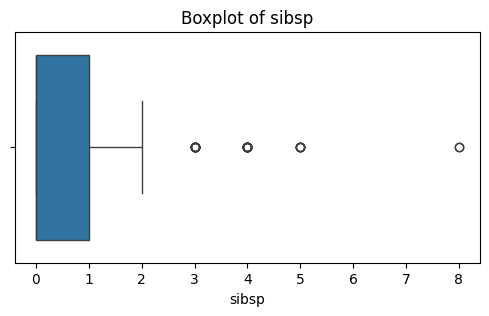

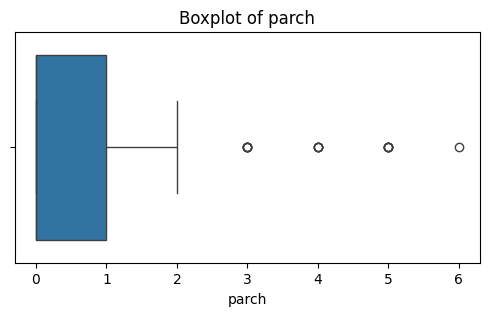

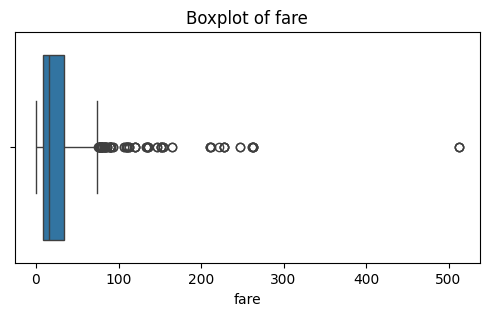

In [7]:
# Now, lets check for outliers in the data. We can do this for both categorical data and numeric to see if there are values that appear less frequently, or if there is a very large number

# Loop through numerical columns and create a boxplot for each
numerical_cols = titanic_data.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=titanic_data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [8]:
# Fare has an extreme outlier of >500
# Check the class of the passengers with fare 500
expensive_fare_passenger = titanic_data[titanic_data['fare'] >= 500]
print(expensive_fare_passenger)

# We see that each client has similar characteristics and is in first class, which can be very expensive. As such, we are leaving this outlier in

     survived  pclass     sex   age  sibsp  parch      fare embarked  class  \
258         1       1  female  35.0      0      0  512.3292        C  First   
679         1       1    male  36.0      0      1  512.3292        C  First   
737         1       1    male  35.0      0      0  512.3292        C  First   

       who  adult_male embark_town alive  alone  
258  woman       False   Cherbourg   yes   True  
679    man        True   Cherbourg   yes  False  
737    man        True   Cherbourg   yes   True  


In [9]:
# Data is now cleaned

# Display the first few records
print(titanic_data.head())

# Review the structure of the dataset
print(titanic_data.info())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male  embark_town alive  alone  
0    man        True  Southampton    no  False  
1  woman       False    Cherbourg   yes  False  
2  woman       False  Southampton   yes   True  
3  woman       False  Southampton   yes  False  
4    man        True  Southampton    no   True  
<class 'pandas.core.frame.DataFrame'>
Index: 773 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     773 non-null    int64   
 1   pclass       77